# Part 1: Data Cleaning


    Business Objectives
    
    This company is the largest online loan marketplace, facilitating personal loans, business loans, 
    and financing of medical procedures. Borrowers can easily access lower interest rate loans through
    a fast online interface. 
    
    The company wants to understand the driving factors (or driver variables) behind loan default,
    i.e. the variables which are strong indicators of default.  The company can utilise this knowledge 
    for its portfolio and risk assessment. 
    
    We have to do univariate and multivariate analysis to find the risky indiacators.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#adding the path of the src dir to the notebook path
import sys
sys.path.insert(0, '/Users/manish/Documents/Projects/data_science/Lending_club_case_study/src')

from functions import *

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 1000)

In [2]:
#creating a path variable for the .csv file
path = '/Users/manish/Documents/Projects/data_science/Lending_club_case_study/data/raw_data/loan.csv'

In [3]:
#reading the .csv file to a pandas dataframe instance
loan = pd.read_csv(path)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Basic info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


The data has `111` columns, with `74` float type, `13` int type and `24` categorical type columns.
The data has a total of `39717` entries.


The data is too big to find the identifiers directly, we have to choose the relevant columns.
But before that lets check the missing values in the columns

The target column or y is `loan_status`. Lets check the column

In [5]:
#loan status
print('loan_status missing entries: ' ,loan.loan_status.isnull().sum())
print('---'*10)
print(f'''loan_status categories: 
{loan.loan_status.value_counts()}
''')

loan_status missing entries:  0
------------------------------
loan_status categories: 
Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64



### Loan status analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

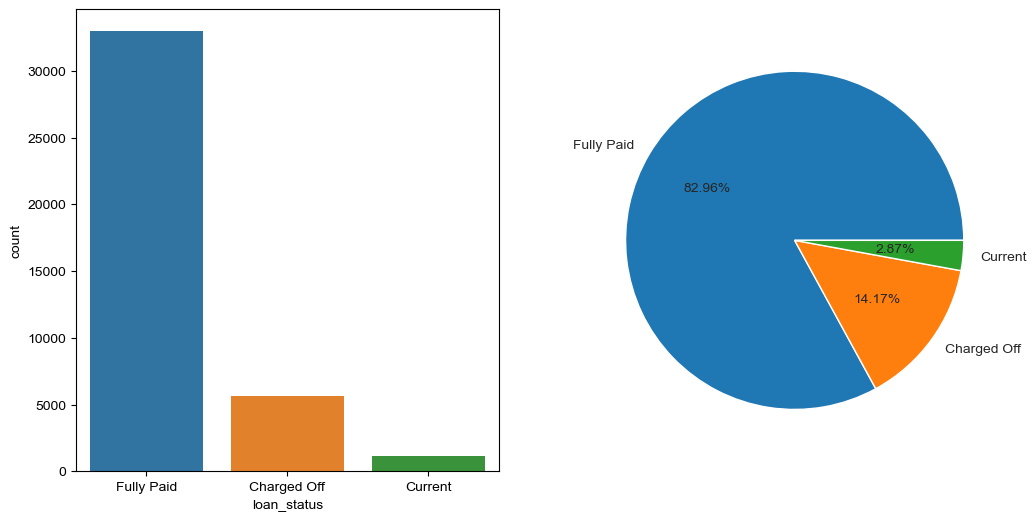

In [7]:
#some plots to check the loan status column

plt.figure(figsize = (12,6) )


plt.subplot(1,2,1)
sns.countplot(x = loan.loan_status, )
sns.set_style('whitegrid')



plt.subplot(1,2,2)
plt.pie(loan.loan_status.value_counts(), labels = loan.loan_status.unique(), autopct = '%.2f%%')


plt.show()


There are `0` missing entries in the target columns and `5627` defaulted loans, `32950` have fully paid loan status and `1140` loans are ongoing. We have to analyze the defaulters.

Lets get the data for only those who have either defaulted or fully paid

In [8]:
loan = loan[loan.loan_status != 'Current']
loan.shape

(38577, 111)

In [9]:
#Missing value initially
get_null_unique(loan, loan.columns)

id :  [1077501 1077430 1077175 1076863 1075269 1069639 1072053 1071795 1071570
 1070078]
Unique:  38577
Null per_cent:  0.0
------------------------------------------------------------
member_id :  [1296599 1314167 1313524 1277178 1311441 1304742 1288686 1306957 1306721
 1305201]
Unique:  38577
Null per_cent:  0.0
------------------------------------------------------------
loan_amnt :  [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]
Unique:  870
Null per_cent:  0.0
------------------------------------------------------------
funded_amnt :  [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]
Unique:  1019
Null per_cent:  0.0
------------------------------------------------------------
funded_amnt_inv :  [ 4975.  2500.  2400. 10000.  5000.  7000.  3000.  5600.  5350.  6500.]
Unique:  8050
Null per_cent:  0.0
------------------------------------------------------------
term :  [' 36 months' ' 60 months']
Unique:  2
Null per_cent:  0.0
-----------------------------

Null per_cent:  64.56
------------------------------------------------------------
mths_since_last_record :  [ nan 113. 105.  97.  33.  93.  52.  85.  90.  91.]
Unique:  112
Null per_cent:  92.9
------------------------------------------------------------
open_acc :  [ 3  2 10  9  7  4 11 14 12 20]
Unique:  40
Null per_cent:  0.0
------------------------------------------------------------
pub_rec :  [0 1 2 3 4]
Unique:  5
Null per_cent:  0.0
------------------------------------------------------------
revol_bal :  [13648  1687  2956  5598  7963 17726  8221  5210  9279  4032]
Unique:  21275
Null per_cent:  0.0
------------------------------------------------------------
revol_util :  ['83.70%' '9.40%' '98.50%' '21%' '28.30%' '85.60%' '87.50%' '32.60%'
 '36.50%' '20.60%']
Unique:  1089
Null per_cent:  0.13
------------------------------------------------------------
total_acc :  [ 9  4 10 37 12 11 13  3 23 34]
Unique:  82
Null per_cent:  0.0
---------------------------------------------

Null per_cent:  100.0
------------------------------------------------------------
num_accts_ever_120_pd :  [nan]
Unique:  1
Null per_cent:  100.0
------------------------------------------------------------
num_actv_bc_tl :  [nan]
Unique:  1
Null per_cent:  100.0
------------------------------------------------------------
num_actv_rev_tl :  [nan]
Unique:  1
Null per_cent:  100.0
------------------------------------------------------------
num_bc_sats :  [nan]
Unique:  1
Null per_cent:  100.0
------------------------------------------------------------
num_bc_tl :  [nan]
Unique:  1
Null per_cent:  100.0
------------------------------------------------------------
num_il_tl :  [nan]
Unique:  1
Null per_cent:  100.0
------------------------------------------------------------
num_op_rev_tl :  [nan]
Unique:  1
Null per_cent:  100.0
------------------------------------------------------------
num_rev_accts :  [nan]
Unique:  1
Null per_cent:  100.0
-----------------------------------------

In [10]:
#getting null column lists and % of missing values in it
Null_counts = get_Null_counts(loan)

In [11]:
#checking the columns count with % of missing values
print(Null_counts.value_counts(ascending = False))

100.00    55
0.00      43
0.15       2
6.19       1
2.68       1
32.47      1
0.03       1
64.56      1
92.90      1
0.13       1
0.18       1
0.01       1
1.81       1
0.10       1
dtype: int64


The data has huge number of columns `>50` that `100%` missing values. We can absolutely drop them
1 column has `97.2 %`, and 1 has `97.13%` missing values. We can drop them as well.


Also 1 column seems to have `65%` and other has `32.6%` missing values we can drop these and still have
`53` columns to work with

In [12]:
#getting the list of all these columns
Drop_columns_cent_percent = Null_counts.index[Null_counts.values == 100]

In [13]:
print(list(Drop_columns_cent_percent))

['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total

In [14]:
loan.shape

(38577, 111)

In [15]:
#dropping null columns
loan = loan.drop(columns = Drop_columns_cent_percent, axis = 1)
loan.shape

(38577, 56)

In [16]:
#updating Null_counts
Null_counts = get_Null_counts(loan)

In [17]:
Rest_all_high_missing_value_columns = Null_counts.index[Null_counts.values > 30]
print(list(Rest_all_high_missing_value_columns))

['desc', 'mths_since_last_delinq', 'mths_since_last_record']


In [18]:
#Dropping these columns
loan = loan.drop(Rest_all_high_missing_value_columns, axis = 1)
loan.shape

(38577, 53)

In [19]:
#Updating null counts
Null_counts = get_Null_counts(loan)


In [20]:
print(Null_counts)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.68
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

We have dropped all the columns with `100%` missing values.
We have all the columns with more than `30%` missing values.
Lets check the rest of the null columns


In [21]:
#making a list of remaining null columns
Remaining_nulls = list(Null_counts[Null_counts.values > 0].index)


In [22]:
loan.loc[:, Remaining_nulls]

,emp_title,emp_length,title,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,NaN,10+ years,Computer,83.70%,Jan-15,May-16,0.0,0.0,0.0,0.0
1,Ryder,< 1 year,bike,9.40%,Apr-13,Sep-13,0.0,0.0,0.0,0.0
2,NaN,10+ years,real estate business,98.50%,Jun-14,May-16,0.0,0.0,0.0,0.0
3,AIR RESOURCES BOARD,10+ years,personel,21%,Jan-15,Apr-16,0.0,0.0,0.0,0.0
5,Veolia Transportaton,3 years,My wedding loan I promise to pay back,28.30%,Jan-15,Jan-16,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
39712,FiSite Research,4 years,Home Improvement,13.10%,Jul-10,Jun-10,NaN,NaN,NaN,NaN
39713,"Squarewave Solutions, Ltd.",3 years,Retiring credit card debt,26.90%,Jul-10,Jul-10,NaN,NaN,NaN,NaN
39714,NaN,< 1 year,MBA Loan Consolidation,19.40%,Apr-08,Jun-07,NaN,NaN,NaN,NaN
39715,NaN,< 1 year,JAL Loan,0.70%,Jan-08,Jun-07,NaN,NaN,NaN,NaN


In [23]:
#creating the dictionary file path
dict_path = '/Users/manish/Documents/Projects/data_science/Lending_club_case_study/data/raw_data/Data_Dictionary.xlsx'

In [24]:
dict_df = pd.read_excel(dict_path)

In [25]:
dict_df[dict_df.LoanStatNew.isin(Remaining_nulls)]

,LoanStatNew,Description
10,chargeoff_within_12_mths,Number of charge-offs within 12 months
12,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
20,emp_title,The job title supplied by the Borrower when applying for the loan.*
36,last_credit_pull_d,The most recent month LC pulled credit for this loan
40,last_pymnt_d,Last month payment was received
86,pub_rec_bankruptcies,Number of public record bankruptcies
91,revol_util,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
93,tax_liens,Number of tax liens
95,title,The loan title provided by the borrower


In [26]:
Null_counts[Remaining_nulls]

emp_title                     6.19
emp_length                    2.68
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.15
chargeoff_within_12_mths      0.15
pub_rec_bankruptcies          1.81
tax_liens                     0.10
dtype: float64

In [27]:
Remaining_nulls

['emp_title',
 'emp_length',
 'title',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [28]:
#looking at null_values
get_null_unique(loan, Remaining_nulls)

emp_title :  [nan 'Ryder' 'AIR RESOURCES BOARD' 'Veolia Transportaton'
 'Southern Star Photography' 'MKC Accounting ' 'Starbucks'
 'Southwest Rural metro' 'UCLA' 'Va. Dept of Conservation/Recreation']
Unique:  28028
Null per_cent:  6.19
------------------------------------------------------------
emp_length :  ['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years']
Unique:  12
Null per_cent:  2.68
------------------------------------------------------------
title :  ['Computer' 'bike' 'real estate business' 'personel'
 'My wedding loan I promise to pay back' 'Loan' 'Car Downpayment'
 'Expand Business & Buy Debt Portfolio' 'Building my credit history.'
 'High intrest Consolidation']
Unique:  19298
Null per_cent:  0.03
------------------------------------------------------------
revol_util :  ['83.70%' '9.40%' '98.50%' '21%' '28.30%' '85.60%' '87.50%' '32.60%'
 '36.50%' '20.60%']
Unique:  1089
Null per_cent:  0.13
-------------------------

    emp_title is irrelevant as it has 4637 unique entries. It is better to drop these columns
    
    title can also be dropped citing the same issue
    
    revol_util is an imp column and has 0.28 nan values and we can drop these values
    
    collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens are not useful as they 
    have only 0 or nan values
    
    we can drop the null entries from remaining columns

In [29]:
#dropping the non-useful columns
loan = loan.drop(columns = ['emp_title', 'title', 'collections_12_mths_ex_med',
                    'chargeoff_within_12_mths', 'tax_liens'], axis = 1)

In [30]:
#dropping null entries
loan = loan.dropna(subset = ['emp_length', 'revol_util', 'last_pymnt_d', 
                      'last_credit_pull_d', 'pub_rec_bankruptcies'], axis = 0)

In [31]:
#now we have treated missing values
loan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

In [32]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [33]:
#Lets get closer look at remaining columns
get_null_unique(loan, loan.columns)

id :  [1077501 1077430 1077175 1076863 1075269 1069639 1072053 1071795 1071570
 1070078]
Unique:  36737
Null per_cent:  0.0
------------------------------------------------------------
member_id :  [1296599 1314167 1313524 1277178 1311441 1304742 1288686 1306957 1306721
 1305201]
Unique:  36737
Null per_cent:  0.0
------------------------------------------------------------
loan_amnt :  [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]
Unique:  855
Null per_cent:  0.0
------------------------------------------------------------
funded_amnt :  [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]
Unique:  1009
Null per_cent:  0.0
------------------------------------------------------------
funded_amnt_inv :  [ 4975.  2500.  2400. 10000.  5000.  7000.  3000.  5600.  5350.  6500.]
Unique:  7596
Null per_cent:  0.0
------------------------------------------------------------
term :  [' 36 months' ' 60 months']
Unique:  2
Null per_cent:  0.0
-----------------------------

Null per_cent:  0.0
------------------------------------------------------------
pub_rec_bankruptcies :  [0. 1. 2.]
Unique:  3
Null per_cent:  0.0
------------------------------------------------------------


The above analysis shows that there are some columns with too many unique values that are not essential in finding the defaulters and some with only 1 unique value which is also not useful.

In [34]:
#list_of_columns that have too many or 1 unique entry which are irrelevant

ls_unnecessary = ['id', 'member_id', 'pymnt_plan', 'url', 'out_prncp_inv',
                 'url', 'zip_code', 'addr_state', 'initial_list_status',
                 'out_prncp', 'policy_code', 'application_type',
                 'acc_now_delinq', 'delinq_amnt']

In [35]:
#dropping these columns
loan = loan.drop(columns = ls_unnecessary, axis = 1)

In [36]:
#Lets check rest columns
get_null_unique(loan, loan.columns)

loan_amnt :  [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]
Unique:  855
Null per_cent:  0.0
------------------------------------------------------------
funded_amnt :  [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]
Unique:  1009
Null per_cent:  0.0
------------------------------------------------------------
funded_amnt_inv :  [ 4975.  2500.  2400. 10000.  5000.  7000.  3000.  5600.  5350.  6500.]
Unique:  7596
Null per_cent:  0.0
------------------------------------------------------------
term :  [' 36 months' ' 60 months']
Unique:  2
Null per_cent:  0.0
------------------------------------------------------------
int_rate :  ['10.65%' '15.27%' '15.96%' '13.49%' '7.90%' '18.64%' '21.28%' '12.69%'
 '14.65%' '9.91%']
Unique:  336
Null per_cent:  0.0
------------------------------------------------------------
installment :  [162.87  59.83  84.33 339.31 156.46 170.08 109.43 152.39 121.45 153.45]
Unique:  14369
Null per_cent:  0.0
--------------------------

In [37]:
loan.shape

(36737, 35)

In [38]:
#Now we will use these columns for further data cleaning
#lets save the clean data to a csv file

#loan.to_csv('loan_cleaned.csv', sep = ',', index = False)

### Lets get to part 2 of data cleaning